In [1]:
# imports
from utils import *
from lightgbm import LGBMClassifier
import pickle


In [2]:
# read the configuration file and initialize random generators
cfg = read_config('configfiles/config.yaml')
seeds = read_config('configfiles/seed_config.yaml')
initalize_random_generators(seeds)

In [3]:
categories = ["Toilet","Shower","Faucet","ClothesWasher","Dishwasher","Bathtub"]
def map_to_category(y: int, categories: list):
    y = int(y)
    return categories[y-1]

allData = pd.read_csv(cfg['dataset'])

In [4]:
# process dataset (separate features & classes, split in train and test, reduce train size if needed)
X_cv, X_test, y_cv, y_test = data_prep(allData, cfg['features'], cfg['target'],
                                       randomState=seeds['dprep_seed'], 
                                       testSize=cfg['frac_tst'], 
                                       trainSize=cfg['train_size'])

y_cv = y_cv.map(lambda x: map_to_category(x, categories))
y_test = y_test.map(lambda x: map_to_category(x, categories))

In [ ]:
model_params = pd.read_pickle('best_models_wo_smote')['params'][0]
lgbm = LGBMClassifier(**model_params)
lgbm.fit(X_cv, y_cv)

In [6]:
y_hat = lgbm.predict(X_test)

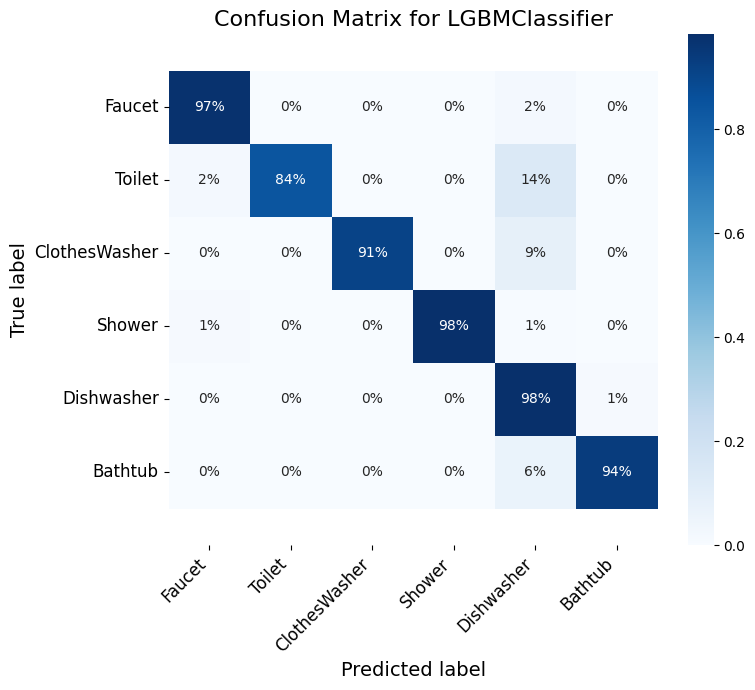

In [8]:
_, ax = get_confusion_matrix(y_test, y_hat, plot=True, labels=categories)
ax.set_title('Confusion Matrix for LGBMClassifier', fontsize=16)
plt.tight_layout()

In [9]:
pickle.dump(lgbm, open('lgbm_model.pkl', 'wb'))

In [10]:
lgbm = pickle.load(open('lgbm_model.pkl', 'rb'))
y_hat = lgbm.predict(X_test)

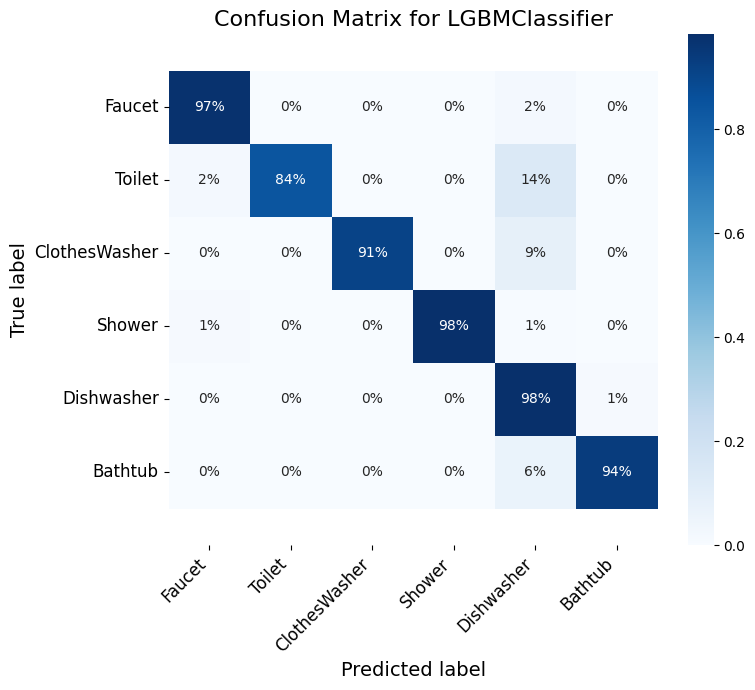

In [11]:
_, ax = get_confusion_matrix(y_test, y_hat, plot=True, labels=categories)
ax.set_title('Confusion Matrix for LGBMClassifier', fontsize=16)
plt.tight_layout()